In [2]:
import pandas as pd 
from colomoto_jupyter import tabulate
import seaborn as sns

In [3]:
import ginsim

## Basic Analysis
------

based on: https://colomoto.github.io/colomoto-docker/ 

In [4]:
model = ginsim.load("Mar2023.zginml")

In [5]:
ginsim.show(model)

In [6]:
import biolqm

In [7]:
lqm = ginsim.to_biolqm(model)

In [8]:
fps = biolqm.fixpoints(lqm)

In [10]:
fps_df = tabulate(fps)
# fps_df

In [11]:
cm = sns.light_palette("green", as_cmap=True)

fps_df.style.background_gradient(cmap=cm)

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
5,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1


In [12]:
# Create a dictionary of steady states and their "classification" - according to Ǒzlem

steady_states = {}
steady_states[0] = 'NE'
steady_states[1] = '5-6'
steady_states[2] = '7-4'
steady_states[3] = 'NP'
steady_states[4] = 'NE'
steady_states[5] = '5-3'
steady_states[6] = 'NP'
steady_states[7] = '6-2'
steady_states[8] = 'NE'
steady_states[9] = 'NE'
steady_states[10] = '5-2'
steady_states[11] = '5-3'
steady_states[12] = 'NP'
steady_states[13] = 'NP'
steady_states[14] = '7-1'
steady_states[15] = '6-2'

In [13]:
print(len(fps), "fixpoints")

16 fixpoints


In [14]:
fps_df['class'] = steady_states.values()

In [177]:
# fps_df.to_csv("steady_states.csv")

In [62]:
cm = sns.light_palette("green", as_cmap=True)

fps_df.style.background_gradient(cmap=cm)

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,class
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,NE
1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,5-6
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,7-4
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,NP
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,NE
5,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,5-3
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,NP
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,6-2
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,NE
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,NE


In [15]:
fps_df.sort_values('class').drop(['NB7_4', 'NB7_1', 'NB5_6', 'NB5_3', 'NB5_2', 'NB6_2'], axis=1).style.background_gradient(cmap=cm)

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,class
10,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,5-2
5,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,5-3
11,1,1,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,5-3
1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,5-6
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,6-2
15,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,6-2
14,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,1,0,7-1
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,1,1,0,0,1,1,0,7-4
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,NE
4,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,NE


Visualize stable satates 

In [63]:
ginsim.show(model, fps[6])

## Maboss 
------

In [82]:
masim = ginsim.to_maboss(model)

In [19]:
# masim.network.set_output(('Dr', 'ind', 'vnd','en','wg','gsb','svp','ac'))  # markers
masim.network.set_output(('NB5_6', 'NB5_3', 'NB5_2', 'NB6_2', 'NB7_4', 'NB7_1'))

In [20]:
maboss.set_nodes_istate(masim, ["Hh", "Wg", "Egfr", 'pGro'], 
                          [0.5, 0.5])

In [21]:
print(masim.get_initial_state())

{'Egfr': [0, 1], 'pGro': [0, 1], 'Wg': [0, 1], 'Hh': [0, 1], 'Dr': 0, 'ind': 0, 'vnd': 0, 'en': 0, 'wg': 0, 'gsb': 0, 'svp': 0, 'ac': 0, 'NB7_4': 0, 'NB7_1': 0, 'NB5_6': 0, 'NB5_3': 0, 'NB5_2': 0, 'NB6_2': 0, 'Ptc': 0, 'Ci_act': 0, 'Ci_rep': 0, 'Fz': 0, 'Smo': 0, 'Arm': 0, 'Pan': 0, 'Rl': 0, 'Pnt': 0, 'Gro': 0, 'hh': 0, 'hkb': 0}


In [22]:
res = masim.run()

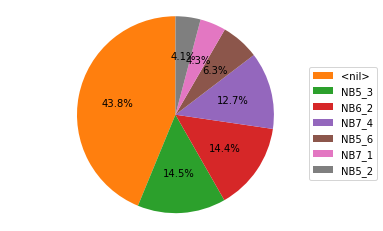

In [23]:
res.plot_piechart() 

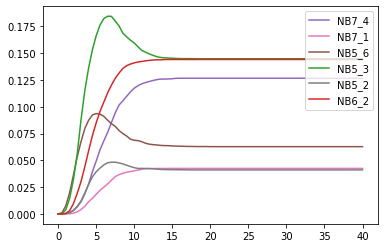

In [24]:
res.plot_node_trajectory(until=40)

In [25]:
# restable = res.get_fptable()
print(res.get_last_states_probtraj())

           <nil>   NB5_2   NB5_3   NB5_6   NB6_2   NB7_1   NB7_4
999.0000  0.4378  0.0411  0.1449  0.0628  0.1442  0.0425  0.1267


In [26]:
print(res.get_fptable())  # can derive percentages myself, i.e one 7-4 is NP...

     FP   Proba                                              State  Egfr  \
0    #1  0.0593  pGro -- Wg -- ind -- Pan -- en -- Ptc -- svp -...     0   
1    #2  0.0628  Hh -- Dr -- Gro -- Ci_act -- wg -- gsb -- NB5_...     0   
2    #3  0.0615  pGro -- Hh -- ind -- Ci_act -- wg -- gsb -- sv...     0   
3    #4  0.0819  Egfr -- pGro -- Rl -- ind -- Pnt -- Ci_rep -- ...     1   
4    #5  0.0840  Egfr -- pGro -- Rl -- Wg -- Hh -- ind -- Pnt -...     1   
5    #6  0.0602  pGro -- Wg -- Hh -- ind -- Pan -- en -- gsb --...     0   
6    #7  0.0834  Egfr -- pGro -- Rl -- Hh -- ind -- Pnt -- Ci_a...     1   
7    #8  0.0641  Wg -- Hh -- Dr -- Gro -- Pan -- en -- gsb -- a...     0   
8    #9  0.0597         pGro -- ind -- Ci_rep -- Ptc -- svp -- hkb     0   
9   #10  0.0906  Egfr -- pGro -- Rl -- Wg -- ind -- Pnt -- Pan ...     1   
10  #11  0.0640                         Dr -- Gro -- Ci_rep -- Ptc     0   
11  #12  0.0411  Egfr -- pGro -- Rl -- Hh -- vnd -- Pnt -- Ci_a...     1   
12  #13  0.0

In [27]:
# import biosimulators_ginsim as simulator # tutorial  not clear https://docs.biosimulators.org/Biosimulators_GINsim/source/biosimulators_ginsim.html

To Do: mutations analysis (1 at a time, 2 at a time etc...)

In [28]:
output_nodes = ['NB7_4', 'NB7_1', 'NB5_6', 'NB5_3', 'NB5_2', 'NB6_2']
mutants = [node for node in masim.network if node not in output_nodes]

In [29]:
import matplotlib.pyplot as plt

In [30]:
import os 
# os.mkdir("perturbations/KOs")
# os.mkdir("perturbations/KIs")

In [ ]:
for mut in mutants:
    masim_copy = masim.copy()
    masim_copy.mutate(mut, 'OFF')
    mares = masim_copy.run()
    name = mut+'/--'
    # mares.plot_piechart()
    # plt.title("%s mutant" %name)

    # plt.savefig("perturbations/KOs/KO_" + mut + ".png")

    # mares.get_fptable().to_csv("perturbations/KOs/KO_" + mut + ".csv")
    
    

In [53]:
for filename in os.scandir("perturbations/KOs/"):
    if filename.path.endswith('.csv'):
        fptable = pd.read_csv(filename, index_col=0, header=0)
        fptable_dict = fptable.drop(['FP', 'Proba', 'State'], axis=1).to_dict(orient='index')
        for fp in fptable_dict.values():
            ginsim.show(model, fp)
            


In [32]:
filename = 'perturbations/KOs/Egfr_KOs/KO_Rl.csv'
fptable = pd.read_csv(filename, index_col=0, header=0)
fptable_dict = fptable.drop(['FP', 'Proba', 'State'], axis=1).to_dict(orient='index')
for fp in fptable_dict.values():
    ginsim.show(model, fp)
    

In [33]:
ginsim.show(model, fptable_dict[7])

pGro KO

In [34]:
filename = 'perturbations/KOs/Hh_KOs/KO_gsb.csv'
fptable = pd.read_csv(filename, index_col=0, header=0)
fptable_dict = fptable.drop(['FP', 'Proba', 'State'], axis=1).to_dict(orient='index')  # len 8

In [35]:
ginsim.show(model, fptable_dict[10])

In [93]:
ptc_ko = pd.read_csv('perturbations/KO_Ptc.csv', index_col=0)
ptc_ko.drop('State', axis=1).style.background_gradient(cmap=cm)

,FP,Proba,Egfr,pGro,Rl,Wg,Hh,ind,vnd,Dr,Gro,Pnt,Pan,en,Ci_act,Ci_rep,wg,Ptc,gsb,ac,svp,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Smo,Fz,Arm,hh,hkb
0,#1,0.082100,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0
1,#2,0.060500,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0
2,#3,0.082500,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
3,#4,0.086200,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0
4,#5,0.063100,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
5,#6,0.088300,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
6,#7,0.059200,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0
7,#8,0.057500,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0
8,#9,0.061500,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
9,#10,0.064600,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0


Smo knock-outs


In [40]:
filename = 'perturbations/KOs/Hh_KOs/KO_Smo.csv'
fptable = pd.read_csv(filename, index_col=0, header=0)
fptable_dict = fptable.drop(['FP', 'Proba', 'State'], axis=1).to_dict(orient='index')  # 

In [43]:
ginsim.show(model, fptable_dict[3])

pGro KO

In [48]:
filename = 'perturbations/KOs/Egfr_KOs/KO_pGro.csv'
fptable = pd.read_csv(filename, index_col=0, header=0)
fptable_dict = fptable.drop(['FP', 'Proba', 'State'], axis=1).to_dict(orient='index')  # 

ginsim.show(model, fptable_dict[1])

-------

## correlations between pathways and nodes 
-----

In [17]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [18]:
wt_fps.drop("class", axis='columns').corr(method="kendall").style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/bj/k8m8vhfd5kgfbr0b9l41ybnw0000gn/T/ipykernel_42205/574378682.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  wt_fps.drop("class", axis='columns').corr(method="kendall").style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb
Egfr,1.00,0.58,0.00,0.00,-0.58,0.00,0.58,0.00,0.00,0.00,0.38,0.00,-0.38,0.26,-0.26,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.58,0.00,0.26
pGro,0.58,1.00,0.00,0.00,-1.00,0.58,0.33,0.00,0.00,0.00,0.65,-0.33,-0.65,0.15,-0.45,0.22,0.15,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.58,-1.00,0.00,0.45
Wg,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-0.58,0.00,0.38,0.58,0.38,0.26,-0.26,-0.38,-0.26,0.38,0.00,-0.58,-0.58,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
Hh,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.58,1.00,0.00,0.00,0.00,0.26,0.26,0.38,0.26,0.38,-1.00,0.58,-0.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.77
Dr,-0.58,-1.00,0.00,0.00,1.00,-0.58,-0.33,0.00,0.00,0.00,-0.65,0.33,0.65,-0.15,0.45,-0.22,-0.15,-0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.58,-0.58,1.00,0.00,-0.45
ind,0.00,0.58,0.00,0.00,-0.58,1.00,-0.58,0.00,0.00,0.00,0.38,-0.58,-0.38,-0.26,-0.26,0.38,-0.26,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.58,0.00,0.26
vnd,0.58,0.33,0.00,0.00,-0.33,-0.58,1.00,0.00,0.00,0.00,0.22,0.33,-0.22,0.45,-0.15,-0.22,0.45,-0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.58,-0.33,0.00,0.15
en,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-0.58,0.00,0.38,0.58,0.38,0.26,-0.26,-0.38,-0.26,0.38,0.00,-0.58,-0.58,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
wg,0.00,0.00,-0.58,0.58,0.00,0.00,0.00,-0.58,1.00,0.58,-0.22,-0.33,-0.22,-0.15,0.45,0.65,0.45,-0.22,-0.58,1.00,-0.33,-0.58,0.58,-0.58,-0.58,0.00,0.00,0.00,-0.58,-0.45
gsb,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.58,1.00,0.00,0.00,0.00,0.26,0.26,0.38,0.26,0.38,-1.00,0.58,-0.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.77


In [19]:
corr_mat = wt_fps.corr(method="kendall")
corr_mat[['Egfr', 'pGro', 'Hh', 'Wg']].style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/bj/k8m8vhfd5kgfbr0b9l41ybnw0000gn/T/ipykernel_42205/2318264835.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_mat[['Egfr', 'pGro', 'Hh', 'Wg']].style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Egfr,pGro,Hh,Wg
Egfr,1.00,0.58,0.00,0.00
pGro,0.58,1.00,0.00,0.00
Wg,0.00,0.00,0.00,1.00
Hh,0.00,0.00,1.00,0.00
Dr,-0.58,-1.00,0.00,0.00
ind,0.00,0.58,0.00,0.00
vnd,0.58,0.33,0.00,0.00
en,0.00,0.00,0.00,1.00
wg,0.00,0.00,0.58,-0.58
gsb,0.00,0.00,1.00,0.00


## Analytical solutions of perturbations
--------

### Perform Knock-Outs on single nodes 

http://colomoto.org/biolqm/doc/scripting.html

KO of each node of the model, save stable states as a df (as csv)

In [20]:
output_nodes_names = ['NB5_2', 'NB5_3', 'NB5_6', 'NB6_2', 'NB7_1', 'NB7_4']

In [21]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0).drop('class', axis='columns')

In [133]:
for node in lqm.getComponents():
    node_name = node.toString()  # because node is a java Object and not a string
    if node_name in output_nodes_names:
        continue
    
    argument = node.toString()+'%0'
    perturbed = biolqm.fixpoints(biolqm.perturbation(lqm, argument))
    perturbed_df = tabulate(perturbed)  # To Df
    perturbed_df = perturbed_df.merge(wt_fps, how='left', indicator=True)
    # perturbed_df.to_csv('./perturbations/KO_stable_states/' + node_name + '_KO.csv')

"left only" means that it's a new state, not found in the WT stable states table

#### Compare to literature: 
Segment polarity genes paper (Bhat 1999)

wg mutation

In [28]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [29]:
wg_gene_ko_states = pd.read_csv("./perturbations/KO_stable_states/Wg_KO.csv", index_col=0)

In [30]:
wg_gene_ko_states = wg_gene_ko_states.merge(wt_fps, how='left', on=list(wg_gene_ko_states.drop('_merge', axis='columns').columns))
wg_gene_ko_states = wg_gene_ko_states.fillna(value='new').drop('_merge', axis='columns')

In [31]:
wt_fps

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,class
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,NE
1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,5-6
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,7-4
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,NP
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,NE
5,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,5-3
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,NP
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,6-2
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,NE
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,NE


In [32]:
wg_gene_ko_states.sort_values('class').style.background_gradient(cmap=cm)

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,class
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,6-2
15,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,1,0,6-2
14,1,1,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,7-1
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,7-4
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,NE
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,NE
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,NE
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,NE
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,NP
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,NP


In [33]:
wg_gene_ko_states[wg_gene_ko_states['class']=='new'].style.applymap(lambda x: "background-color: green" if x==1 else "background-color: white")

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,class
1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,new
5,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,new
10,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,new
11,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,new


In [34]:
wg_gene_ko_states[wg_gene_ko_states['class']=='6-2'].style.applymap(lambda x: "background-color: green" if x==1 else "background-color: white")

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,class
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,6-2
15,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,1,0,6-2


In [35]:
ginsim.show(model, wg_gene_ko_states.iloc[7,:-1])  # show 7th state for example

#### Triple KO

ptc, gsb, wg

In [ ]:
# for node in lqm.getComponents():
#     node_name = node.toString()  # because node is a java Object and not a string
#     if node_name in output_nodes_names:
#         continue
    
#     argument = node.toString()+'%0'
#     perturbed = biolqm.fixpoints(biolqm.perturbation(lqm, argument))
#     perturbed_df = tabulate(perturbed)  # To Df
#     perturbed_df = perturbed_df.merge(wt_fps, how='left', indicator=True)
#     perturbed_df.to_csv('./perturbations/KO_stable_states/' + node_name + '_KO.csv')

In [204]:
lqm = ginsim.to_biolqm(model)

In [216]:
argument = "en%0 ind%0 gsb%0" # multiple perturbations at once - seperate with space, although tutorial says with comma
perturbed = biolqm.fixpoints(biolqm.perturbation(lqm,argument))

In [217]:
perturbed_df = tabulate(perturbed)
# perturbed_df = perturbed_df.merge(wt_fps, how='left', indicator=True)
# perturbed_df

In [218]:
perturbed_df.style.applymap(lambda x: "background-color: green" if x==1 else "background-color: white")

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0
3,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
5,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
6,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1
7,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
9,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1


### Hh Knock-Outs
-----

Chose groups by common sense + correlations: for each node - which Pathway is the most correlated relative to others?

In [4]:
Hh_nodes = ["Smo", "Ci_act", "wg", "gsb"]
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [5]:
Hh_KOs_old_states = pd.DataFrame()
Hh_KOs_new_states = pd.DataFrame()
  # TO DO: add column that marks which node is knocked out
for hh_node in Hh_nodes:
    node_states_df = pd.read_csv("./perturbations/KO_stable_states/" + hh_node + "_KO.csv", index_col=0)
    node_states_df_old = node_states_df[node_states_df['_merge'] == "both"]
    node_states_df_new = node_states_df[node_states_df['_merge'] == "left_only"]

    node_states_df_old = node_states_df_old.drop("_merge", axis='columns')
    node_states_df_old = node_states_df_old.merge(wt_fps, how='left', on=list(node_states_df_old.columns))
    Hh_KOs_old_states = pd.concat((Hh_KOs_old_states, node_states_df_old))

    node_states_df_new = node_states_df_new.drop("_merge", axis='columns')
    Hh_KOs_new_states = pd.concat((Hh_KOs_new_states, node_states_df_new))
    

In [6]:
Hh_KOs_new_states['class'] = "new"
Hh_KOs_states = pd.concat((Hh_KOs_old_states, Hh_KOs_new_states))

In [7]:
Hh_KOs_output_count = Hh_KOs_states.groupby('class').size()

#### new states - further look
--------

In [ ]:
Hh_KOs_new_states.groupby(Hh_KOs_new_states.columns.to_list(), as_index=False).size()  # all unique rows 

In [241]:
new_states_NBs = Hh_KOs_new_states[(Hh_KOs_new_states['NB7_4'] > 0) | (Hh_KOs_new_states['NB7_1'] > 0) |        # where there is a NB as a phenotype
                  (Hh_KOs_new_states['NB5_6'] > 0) | (Hh_KOs_new_states['NB5_3'] > 0) | 
                  (Hh_KOs_new_states['NB5_2'] > 0) | (Hh_KOs_new_states['NB6_2'] > 0)]

In [ ]:
Hh_KOs_new_states.iloc[~new_states_NBs.index] # new states where all  NB nodes are 0

In [247]:
new_states_NBs.reset_index(drop=True).style.applymap(lambda x: "background-color: green" if x>0 else "background-color: white")

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb
0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0
1,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0
2,1,1,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0
3,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0
4,0,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0


### Wg Knock-Outs
----------

In [8]:
Wg_nodes = ["ac", "Arm", "en", "Pan", "Fz"] 
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [9]:
Wg_KOs_old_states = pd.DataFrame()
Wg_KOs_new_states = pd.DataFrame()
  # TO DO: add column that marks which node is knocked out
for wg_node in Wg_nodes:
    node_states_df = pd.read_csv("./perturbations/KO_stable_states/" + wg_node + "_KO.csv", index_col=0)
    node_states_df_old = node_states_df[node_states_df['_merge'] == "both"]
    node_states_df_new = node_states_df[node_states_df['_merge'] == "left_only"]

    node_states_df_old = node_states_df_old.drop("_merge", axis='columns')
    node_states_df_old = node_states_df_old.merge(wt_fps, how='left', on=list(node_states_df_old.columns))
    Wg_KOs_old_states = pd.concat((Wg_KOs_old_states, node_states_df_old))

    node_states_df_new = node_states_df_new.drop("_merge", axis='columns')
    Wg_KOs_new_states = pd.concat((Wg_KOs_new_states, node_states_df_new))
    

In [10]:
Wg_KOs_new_states['class'] = "new"

In [29]:
Wg_KOs_states = pd.concat((Wg_KOs_old_states, Wg_KOs_new_states))

In [12]:
Wg_KOs_output_count = Wg_KOs_states.groupby('class').size()

### Egfr Knock-Outs
---------

In [13]:
Egfr_nodes = ["Rl", "Pnt", "pGro", "ind", "vnd"]
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [19]:
Egfr_KOs_old_states = pd.DataFrame()
Egfr_KOs_new_states = pd.DataFrame()
  # TO DO: add column that marks which node is knocked out
for egfr_node in Egfr_nodes:
    node_states_df = pd.read_csv("./perturbations/KO_stable_states/" + egfr_node + "_KO.csv", index_col=0)
    node_states_df_old = node_states_df[node_states_df['_merge'] == "both"]
    node_states_df_new = node_states_df[node_states_df['_merge'] == "left_only"]

    node_states_df_old = node_states_df_old.drop("_merge", axis='columns')
    node_states_df_old = node_states_df_old.merge(wt_fps, how='left', on=list(node_states_df_old.columns))
    Egfr_KOs_old_states = pd.concat((Egfr_KOs_old_states, node_states_df_old))

    node_states_df_new = node_states_df_new.drop("_merge", axis='columns')
    Egfr_KOs_new_states = pd.concat((Egfr_KOs_new_states, node_states_df_new))
    

In [20]:
Egfr_KOs_new_states['class'] = "new"

In [17]:
Egfr_KOs_states = pd.concat((Egfr_KOs_old_states, Egfr_KOs_new_states))

In [21]:
Egfr_KOs_output_count = Egfr_KOs_states.groupby('class').size()

!Hh Knock-Outs? !Egfr ? => can choose by negative correlation? 

### Combine Pathways Knock-Out Results
-------

In [56]:
pathways_KOs_output_counts = pd.DataFrame({'Egfr': Egfr_KOs_output_count,
                                  'Wg': Wg_KOs_output_count,
                                  "Hh": Hh_KOs_output_count}, dtype=pd.Int64Dtype()).fillna(0)
pathways_KOs_output_counts

,Egfr,Wg,Hh
class,,,
5-2,1,5,0
5-3,4,10,0
5-6,5,5,0
6-2,4,2,4
7-1,1,0,2
7-4,5,0,4
NE,10,20,16
NP,10,2,14
new,20,36,24


In [23]:
# import matplotlib.pyplot as plt

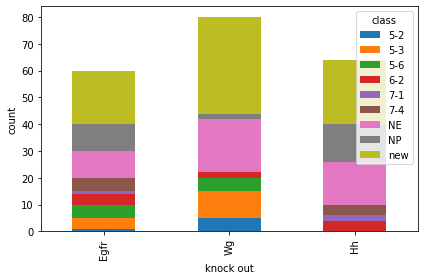

In [57]:
ax = pathways_KOs_output_counts.T.plot.bar(stacked=True)
ax.set_xlabel("knock out")
ax.set_ylabel("count")

plt.tight_layout()

plt.savefig('./perturbations/images/KOs_output_freqs.png', dpi=1000)

### KOs of the rest of the genes
-------

#### svp -  both Wg and Egfr

In [25]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [26]:
svp_KO_old_states = pd.DataFrame()
svp_KO_new_states = pd.DataFrame()
  # TO DO: add column that marks which node is knocked out
node_states_df = pd.read_csv("./perturbations/KO_stable_states/svp_KO.csv", index_col=0)
node_states_df_old = node_states_df[node_states_df['_merge'] == "both"]
node_states_df_new = node_states_df[node_states_df['_merge'] == "left_only"]

node_states_df_old = node_states_df_old.drop("_merge", axis='columns')
node_states_df_old = node_states_df_old.merge(wt_fps, how='left', on=list(node_states_df_old.columns))
svp_KO_old_states = pd.concat((svp_KO_old_states, node_states_df_old))

node_states_df_new = node_states_df_new.drop("_merge", axis='columns')
svp_KO_new_states = pd.concat((svp_KO_new_states, node_states_df_new))

In [27]:
svp_KO_new_states['class'] = "new"

In [30]:
svp_KO_states = pd.concat((svp_KO_old_states, svp_KO_new_states))

In [33]:
svp_KO_output_count = svp_KO_states.groupby('class').size()
svp_KO_output_count

class
5-6     1
NE      1
new    14
dtype: int64

#### Ptc - !Hh 

In [34]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [35]:
ptc_KO_old_states = pd.DataFrame()
ptc_KO_new_states = pd.DataFrame()
  # TO DO: add column that marks which node is knocked out
node_states_df = pd.read_csv("./perturbations/KO_stable_states/Ptc_KO.csv", index_col=0)
node_states_df_old = node_states_df[node_states_df['_merge'] == "both"]
node_states_df_new = node_states_df[node_states_df['_merge'] == "left_only"]

node_states_df_old = node_states_df_old.drop("_merge", axis='columns')
node_states_df_old = node_states_df_old.merge(wt_fps, how='left', on=list(node_states_df_old.columns))
ptc_KO_old_states = pd.concat((ptc_KO_old_states, node_states_df_old))

node_states_df_new = node_states_df_new.drop("_merge", axis='columns')
ptc_KO_new_states = pd.concat((ptc_KO_new_states, node_states_df_new))

In [36]:
ptc_KO_new_states['class'] = "new"

In [37]:
ptc_KO_states = pd.concat((ptc_KO_old_states, ptc_KO_new_states))

In [38]:
ptc_KO_output_count = ptc_KO_states.groupby('class').size()
ptc_KO_output_count

class
5-2    1
5-3    2
5-6    1
6-2    2
7-1    1
NP     1
new    8
dtype: int64

#### Dr KO - !Egfr 

In [39]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [40]:
dr_KO_old_states = pd.DataFrame()
dr_KO_new_states = pd.DataFrame()
  # TO DO: add column that marks which node is knocked out
node_states_df = pd.read_csv("./perturbations/KO_stable_states/Dr_KO.csv", index_col=0)
node_states_df_old = node_states_df[node_states_df['_merge'] == "both"]
node_states_df_new = node_states_df[node_states_df['_merge'] == "left_only"]

node_states_df_old = node_states_df_old.drop("_merge", axis='columns')
node_states_df_old = node_states_df_old.merge(wt_fps, how='left', on=list(node_states_df_old.columns))
dr_KO_old_states = pd.concat((dr_KO_old_states, node_states_df_old))

node_states_df_new = node_states_df_new.drop("_merge", axis='columns')
dr_KO_new_states = pd.concat((dr_KO_new_states, node_states_df_new))

In [41]:
dr_KO_new_states['class'] = "new"
dr_KO_states = pd.concat((dr_KO_old_states, dr_KO_new_states))

In [42]:
dr_KO_output_count = dr_KO_states.groupby('class').size()
dr_KO_output_count

class
5-2    1
5-3    2
6-2    2
7-1    1
NE     3
NP     3
new    4
dtype: int64

#### Gro KO - !Egfr

In [43]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [44]:
gro_KO_old_states = pd.DataFrame()
gro_KO_new_states = pd.DataFrame()
  # TO DO: add column that marks which node is knocked out
node_states_df = pd.read_csv("./perturbations/KO_stable_states/Gro_KO.csv", index_col=0)
node_states_df_old = node_states_df[node_states_df['_merge'] == "both"]
node_states_df_new = node_states_df[node_states_df['_merge'] == "left_only"]

node_states_df_old = node_states_df_old.drop("_merge", axis='columns')
node_states_df_old = node_states_df_old.merge(wt_fps, how='left', on=list(node_states_df_old.columns))
gro_KO_old_states = pd.concat((gro_KO_old_states, node_states_df_old))

node_states_df_new = node_states_df_new.drop("_merge", axis='columns')
gro_KO_new_states = pd.concat((gro_KO_new_states, node_states_df_new))

In [45]:
gro_KO_new_states['class'] = "new"
gro_KO_states = pd.concat((gro_KO_old_states, gro_KO_new_states))

In [46]:
gro_KO_output_count = gro_KO_states.groupby('class').size()
gro_KO_output_count

class
5-2    1
5-3    2
6-2    2
7-1    1
NE     3
NP     3
new    4
dtype: int64

are gro- and dr- KOs are the same states?

In [48]:
gro_KO_states.equals(dr_KO_states)

False

#### Combine Ptc, Dr, Gro, svp Knock-Outs output count 

In [54]:
KOs_output_counts = pd.DataFrame({'Ptc': ptc_KO_output_count,
                                  "Dr": dr_KO_output_count, 
                                  'Gro': gro_KO_output_count, 
                                  'svp': svp_KO_output_count}, dtype=pd.Int64Dtype()).fillna(0)
KOs_output_counts

,Ptc,Dr,Gro,svp
class,,,,
5-2,1,1,1,0
5-3,2,2,2,0
5-6,1,0,0,1
6-2,2,2,2,0
7-1,1,1,1,0
NE,0,3,3,1
NP,1,3,3,0
new,8,4,4,14


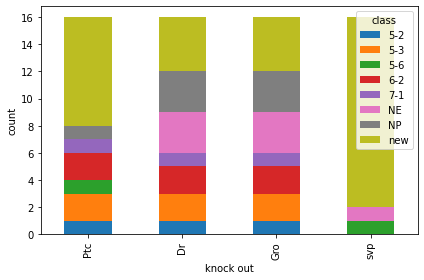

In [55]:
colors={'5-2':'tab:blue', 
        '5-3':'tab:orange',
        '5-6': 'tab:green',
        '6-2': 'tab:red', 
        '7-1': 'tab:purple',
        '7-4': 'tab:brown',
        'NE': 'tab:pink',
        'NP': 'tab:gray',
        'new': 'tab:olive'}
ax = KOs_output_counts.T.plot.bar(stacked=True, color = colors)
ax.set_xlabel("knock out")
ax.set_ylabel("count")

plt.tight_layout()

plt.savefig('./perturbations/images/KOs_output_freqs_svp_ptc_dr_gro.png', dpi=1000)

combine all knock out counts 

In [70]:
cm = sns.light_palette("green", as_cmap=True)

all_KOs_counts = pd.concat((pathways_KOs_output_counts.T, KOs_output_counts.T)).fillna(0)

all_KOs_counts.style.background_gradient(cmap=cm)

class,5-2,5-3,5-6,6-2,7-1,7-4,NE,NP,new
Egfr,1,4,5,4,1,5,10,10,20
Wg,5,10,5,2,0,0,20,2,36
Hh,0,0,0,4,2,4,16,14,24
Ptc,1,2,1,2,1,0,0,1,8
Dr,1,2,0,2,1,0,3,3,4
Gro,1,2,0,2,1,0,3,3,4
svp,0,0,1,0,0,0,1,0,14


to do: normalize with amount of possible outputs (BASED ON STEADY STATE TALBE)

In [83]:
wt_fps = pd.read_csv("steady_states.csv", index_col=0)

In [87]:
wt_fps.groupby("class").size()

class
5-2    1
5-3    2
5-6    1
6-2    2
7-1    1
7-4    1
NE     4
NP     4
dtype: int64

In [92]:
KOs_counts = all_KOs_counts.T.sum(axis=1).sort_values()

for c in wt_fps['class'].unique():
    KOs_counts[c] = KOs_counts[c]/wt_fps.groupby("class").size()[c]
# 

<AxesSubplot:xlabel='class'>

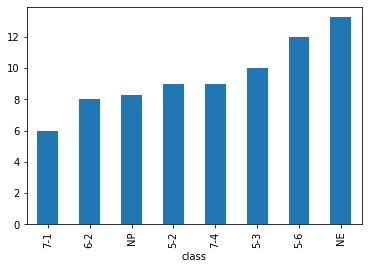

In [106]:
KOs_counts.loc[KOs_counts.index!='new'].sort_values().plot.bar()  # Normalized without 'new' column

<AxesSubplot:xlabel='class'>

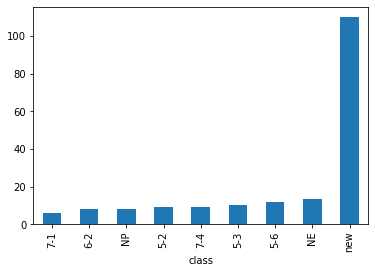

In [100]:
KOs_counts.sort_values().plot.bar()  # normalized, 'new' is not normalized 

Text(0, 0.5, 'count')

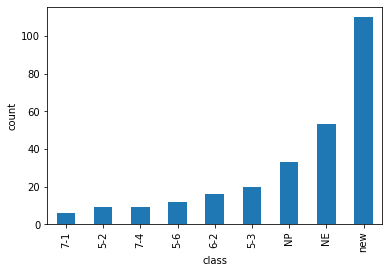

In [74]:
ax= all_KOs_counts.T.sum(axis=1).sort_values().plot.bar()
ax.set_ylabel("count")  # Absolute value

------

## Extended model

In [36]:
ext_model = ginsim.load("Mar2023_extended.zginml")

In [37]:
ginsim.show(ext_model)

In [38]:
import biolqm

In [39]:
ext_lqm = ginsim.to_biolqm(ext_model)

In [40]:
ext_fps = biolqm.fixpoint(ext_lqm)

In [41]:
cm = sns.light_palette("blue", as_cmap=True)
tabulate(ext_fps).style.background_gradient(cmap=cm)

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,NB4_2,slp
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,1,1
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0


In [67]:
ext_fps_df = tabulate(ext_fps)

In [68]:
ext_fps_df.drop(['NB4_2', 'slp'],axis='columns').equals(fps_df.drop("class", axis='columns'))  # without new nodes it's equal

True

correlation of variables

In [69]:
ext_fps_df.corr(method="kendall").style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/bj/k8m8vhfd5kgfbr0b9l41ybnw0000gn/T/ipykernel_42205/960289005.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  ext_fps_df.corr(method="kendall").style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb,NB4_2,slp
Egfr,1.00,0.58,0.00,0.00,-0.58,0.00,0.58,0.00,0.00,0.00,0.38,0.00,-0.38,0.26,-0.26,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.58,0.00,0.26,0.00,0.00
pGro,0.58,1.00,0.00,0.00,-1.00,0.58,0.33,0.00,0.00,0.00,0.65,-0.33,-0.65,0.15,-0.45,0.22,0.15,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.58,-1.00,0.00,0.45,0.22,0.00
Wg,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-0.58,0.00,0.38,0.58,0.38,0.26,-0.26,-0.38,-0.26,0.38,0.00,-0.58,-0.58,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.38,0.58
Hh,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.58,1.00,0.00,0.00,0.00,0.26,0.26,0.38,0.26,0.38,-1.00,0.58,-0.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.77,-0.38,-0.58
Dr,-0.58,-1.00,0.00,0.00,1.00,-0.58,-0.33,0.00,0.00,0.00,-0.65,0.33,0.65,-0.15,0.45,-0.22,-0.15,-0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.58,-0.58,1.00,0.00,-0.45,-0.22,0.00
ind,0.00,0.58,0.00,0.00,-0.58,1.00,-0.58,0.00,0.00,0.00,0.38,-0.58,-0.38,-0.26,-0.26,0.38,-0.26,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.58,0.00,0.26,0.38,0.00
vnd,0.58,0.33,0.00,0.00,-0.33,-0.58,1.00,0.00,0.00,0.00,0.22,0.33,-0.22,0.45,-0.15,-0.22,0.45,-0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.58,-0.33,0.00,0.15,-0.22,0.00
en,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-0.58,0.00,0.38,0.58,0.38,0.26,-0.26,-0.38,-0.26,0.38,0.00,-0.58,-0.58,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.38,0.58
wg,0.00,0.00,-0.58,0.58,0.00,0.00,0.00,-0.58,1.00,0.58,-0.22,-0.33,-0.22,-0.15,0.45,0.65,0.45,-0.22,-0.58,1.00,-0.33,-0.58,0.58,-0.58,-0.58,0.00,0.00,0.00,-0.58,-0.45,-0.22,-0.33
gsb,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.58,1.00,0.00,0.00,0.00,0.26,0.26,0.38,0.26,0.38,-1.00,0.58,-0.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.77,-0.38,-0.58


In [70]:
ext_corr_mat = ext_fps_df.corr(method="kendall")
# focus on input nodes
ext_corr_mat[['Egfr', 'pGro', 'Hh', 'Wg']].style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/bj/k8m8vhfd5kgfbr0b9l41ybnw0000gn/T/ipykernel_42205/3677512286.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  ext_corr_mat[['Egfr', 'pGro', 'Hh', 'Wg']].style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Egfr,pGro,Hh,Wg
Egfr,1.00,0.58,0.00,0.00
pGro,0.58,1.00,0.00,0.00
Wg,0.00,0.00,0.00,1.00
Hh,0.00,0.00,1.00,0.00
Dr,-0.58,-1.00,0.00,0.00
ind,0.00,0.58,0.00,0.00
vnd,0.58,0.33,0.00,0.00
en,0.00,0.00,0.00,1.00
wg,0.00,0.00,0.58,-0.58
gsb,0.00,0.00,1.00,0.00
